In [1]:
from datetime import datetime 
import pandas as pd
from global_map import global_map
import warnings
warnings.filterwarnings('ignore')
import xarray as xr
import numpy as np
import sys
import os
import glob
import warnings
import matplotlib as mpl
import matplotlib.ticker as tkr
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid
from cartopy.mpl.geoaxes import GeoAxes
import cartopy as crt
sys.path.append("..")
from path_dict import path_dict


# PLOTTING inputs
cmap = mpl.colormaps['viridis'].resampled(20)
cmap2 = mpl.colormaps['hot_r']#.resampled(20)
cmap3 = mpl.colormaps['magma_r'].resampled(20)
cmap4 = mpl.colormaps['seismic']#.resampled(20)

In [2]:
# locate timeseries 
dir_data = '/gpfs/work1/0/einf3499/06_model_runs'
dir_wl_new = os.path.join(dir_data,'02_slr_tide_surge_runs','model_input_ERA5_1978')
dir_tide_new = os.path.join(dir_data,'02_slr_tide_surge_runs','model_input_TIDE_1978')
dir_wl_old = os.path.join(dir_data,'02_slr_tide_surge_runs','model_input_ERA5_1978_original')

In [3]:
# station ids
#stations_gtsm = (39598,"IJmuiden") 
stations_gtsm = (18227,"CrossRiver") 

In [4]:
def read_his_file(path):
    ds = xr.open_dataset(path)
    ds = ds.assign_coords({'stations': ds.stations})
    keys = list(ds.keys()) # remove all variables except water level
    if 'waterlevel' in keys:
        keys.remove('waterlevel')
    if 'patm' in keys:
        keys.remove('patm')
    ds = ds.drop(keys)
    return ds

In [5]:
# Open model data
ds_wl_new = read_his_file(os.path.join(dir_wl_new,'output','gtsm_fine_0000_his_tmp.nc'))
ds_wl_old = read_his_file(os.path.join(dir_wl_old,'output','gtsm_fine_0000_his.nc'))
ds_tide_new = read_his_file(os.path.join(dir_tide_new,'output','gtsm_fine_0000_his.nc'))

In [6]:
#wl_mean_new = ds_wl_new.sel(time=slice('1978-01-01','1978-01-20'))['waterlevel'].mean(dim='time')
#wl_mean_old = ds_wl_old.sel(time=slice('1978-01-01','1978-01-20'))['waterlevel'].mean(dim='time')

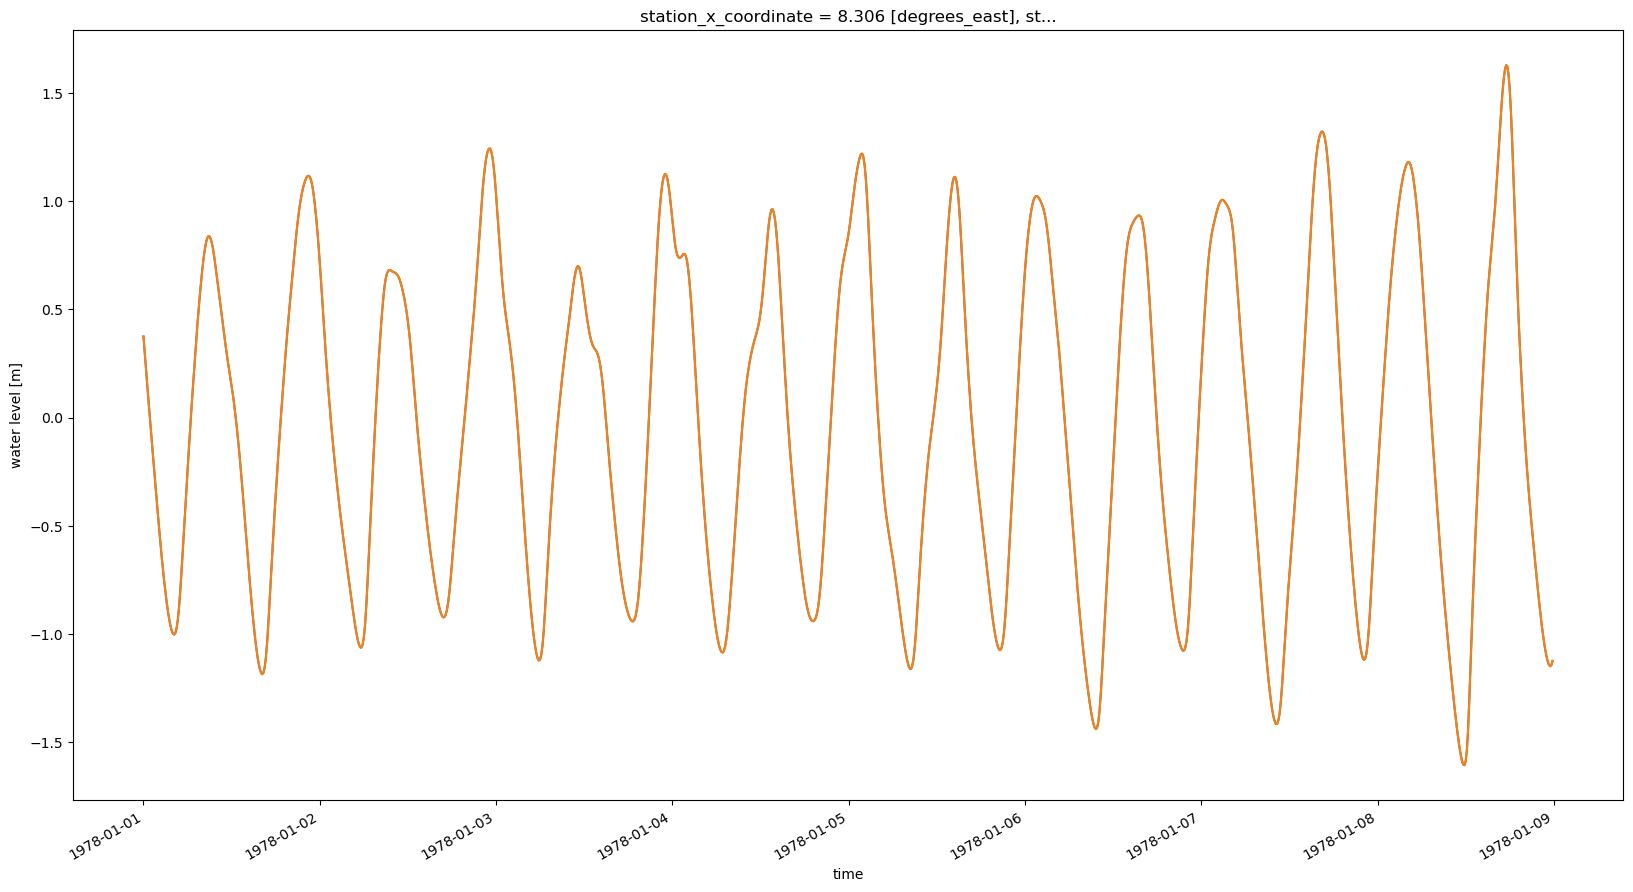

In [10]:
fig,ax = plt.subplots(figsize=(20,10))
ds_wl_new['waterlevel'].sel(time=slice('1978-01-01','1978-01-08'), stations=stations_gtsm[0]).plot(ax=ax)
ds_wl_old['waterlevel'].sel(time=slice('1978-01-01','1978-01-08'), stations=stations_gtsm[0]).plot(ax=ax)

In [20]:
ds_ts_tide_old = xr.open_dataset(os.path.join('/projects/0/einf3499/03_tides_CDS/','historical_tide_1978_02_v1.nc'))

In [22]:
ds_ts_surge_old = xr.open_dataset(os.path.join('/projects/0/einf3499/06_model_runs/03_postprocessing/timeseries-GTSM-ERA5-10min/surge/','reanalysis_surge_10min_1978_02_v1.nc'))

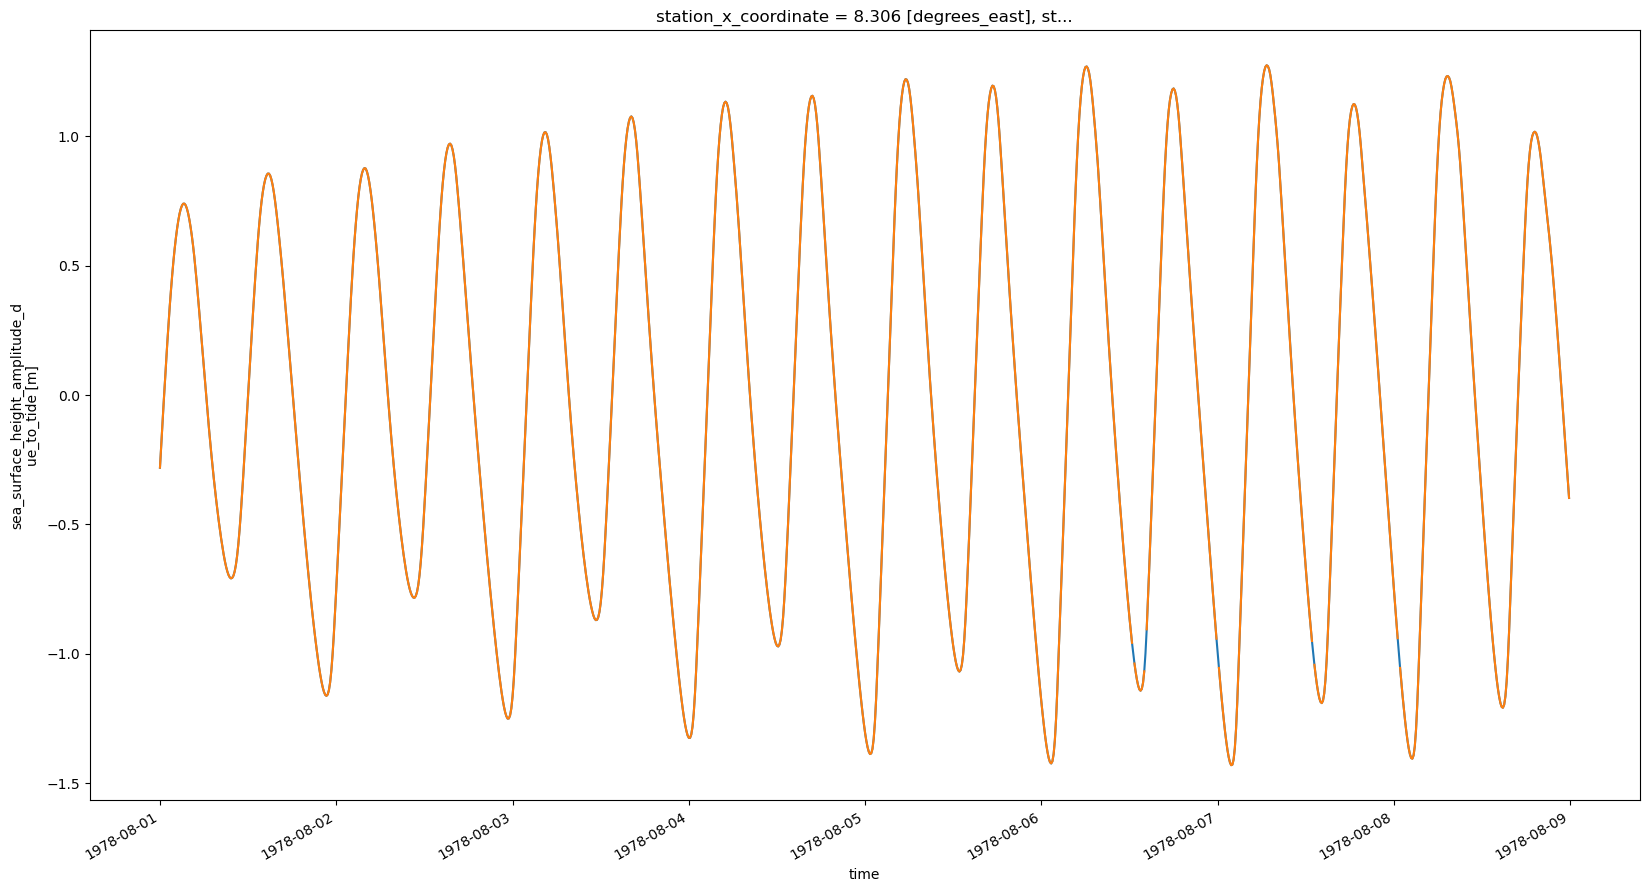

In [43]:
fig,ax = plt.subplots(figsize=(20,10))
ds_tide_new['waterlevel'].sel(time=slice('1978-02-01','1978-02-08'), stations=stations_gtsm[0]).plot(ax=ax)
ds_ts_tide_old['tide'].sel(time=slice('1978-02-01','1978-02-08'), stations=stations_gtsm[0]).plot(ax=ax)

In [18]:
ds_wl_old['waterlevel'].sel(stations=stations_gtsm[0],time=slice('1978-02-01','1978-02-08'))

<xarray.DataArray 'waterlevel' (time: 1081)>
[1081 values with dtype=float64]
Coordinates:
    station_x_coordinate  float64 ...
    station_y_coordinate  float64 ...
    station_name          |S256 ...
  * time                  (time) datetime64[ns] 1978-02-01 ... 1978-02-08T12:...
    stations              int64 18227
Attributes:
    standard_name:  sea_surface_height
    long_name:      water level
    units:          m
    geometry:       station_geom

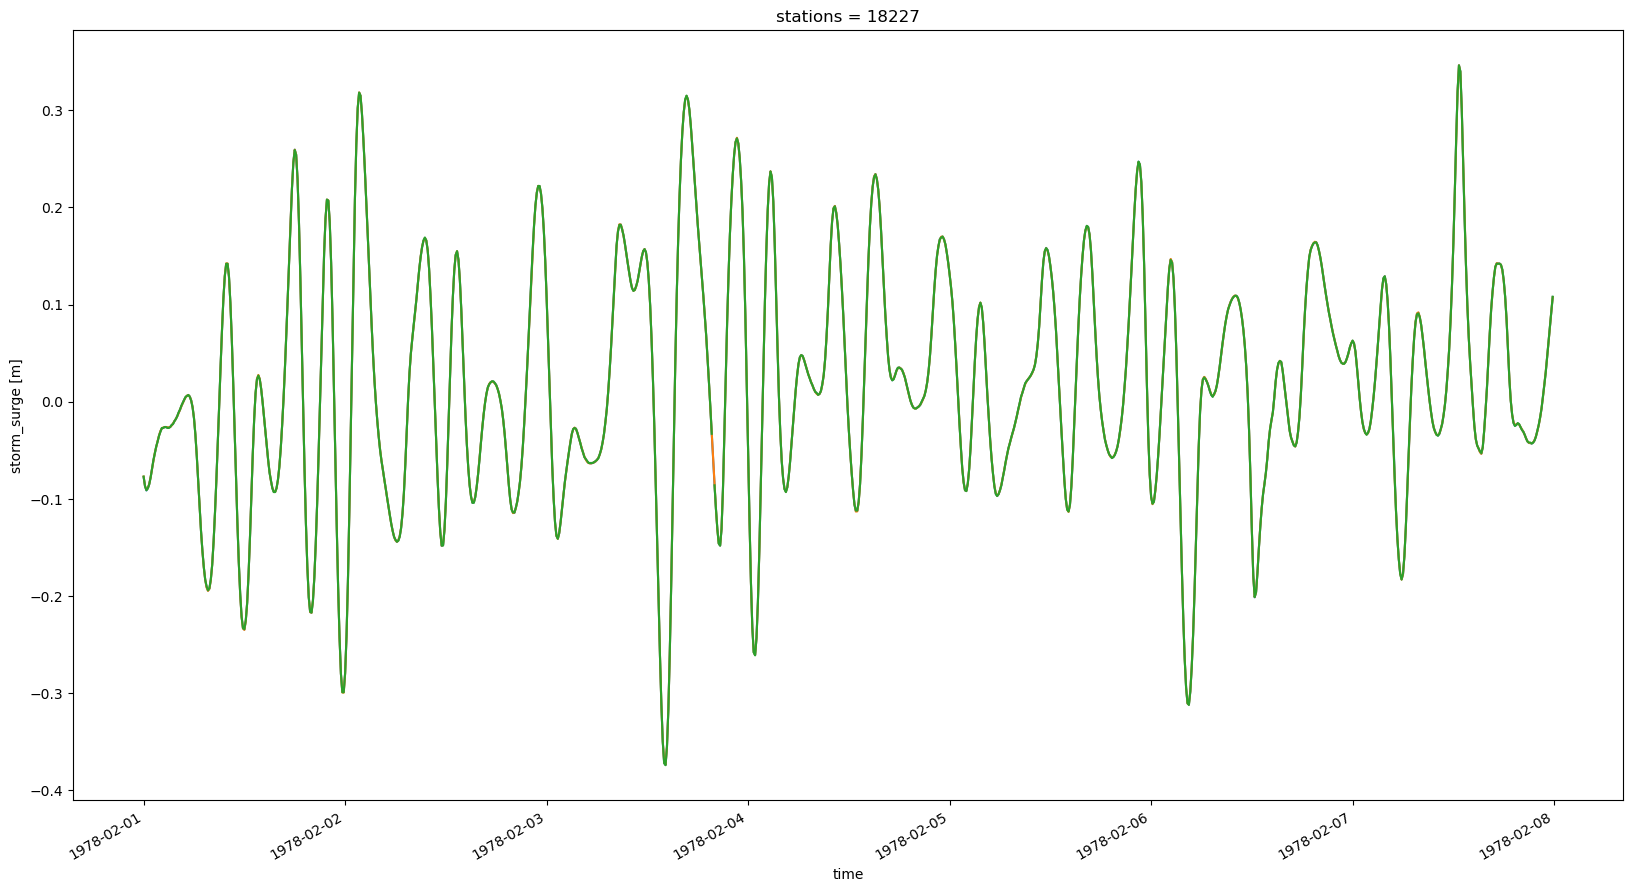

In [23]:
fig,ax = plt.subplots(figsize=(20,10))
(ds_wl_old['waterlevel'].sel(stations=stations_gtsm[0],time=slice('1978-02-01','1978-02-07'))-ds_ts_tide_old['tide'].sel(stations=stations_gtsm[0],time=slice('1978-02-01','1978-02-07'))).plot(ax=ax)
(ds_wl_new['waterlevel'].sel(stations=stations_gtsm[0],time=slice('1978-02-01','1978-02-07'))-ds_tide_new['waterlevel'].sel(stations=stations_gtsm[0],time=slice('1978-02-01','1978-02-07'))).plot(ax=ax)
ds_ts_surge_old['surge'].sel(stations=stations_gtsm[0], time=slice('1978-02-01','1978-02-07')).plot(ax=ax)

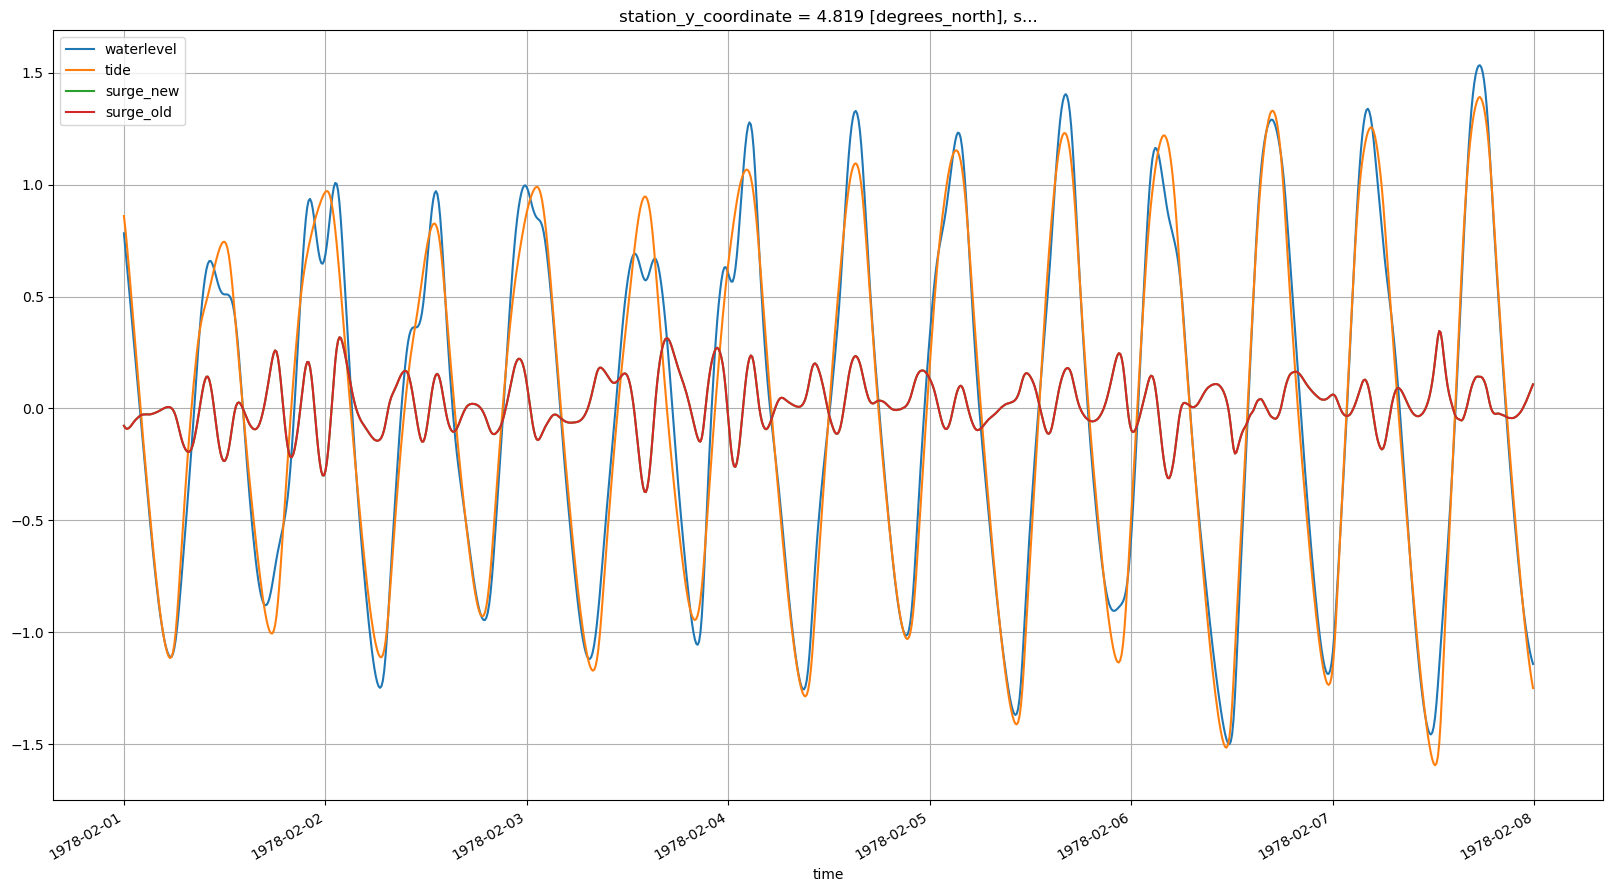

In [24]:
fig,ax = plt.subplots(figsize=(20,10))
ds_wl_new['waterlevel'].sel(time=slice('1978-02-01','1978-02-07'), stations=stations_gtsm[0]).plot(ax=ax, label='waterlevel')
ds_tide_new['waterlevel'].sel(time=slice('1978-02-01','1978-02-07'), stations=stations_gtsm[0]).plot(ax=ax, label='tide')
(ds_wl_new['waterlevel'].sel(stations=stations_gtsm[0],time=slice('1978-02-01','1978-02-07'))-ds_tide_new['waterlevel'].sel(stations=stations_gtsm[0],time=slice('1978-02-01','1978-02-07'))).plot(ax=ax, label="surge_new")
(ds_wl_old['waterlevel'].sel(stations=stations_gtsm[0],time=slice('1978-02-01','1978-02-07'))-ds_ts_tide_old['tide'].sel(stations=stations_gtsm[0],time=slice('1978-02-01','1978-02-07'))).plot(ax=ax, label="surge_old")
ax.grid()
ax.legend()

In [71]:

ds_wl_1979 = xr.open_dataset(os.path.join('/projects/0/einf3499/06_model_runs/03_postprocessing/timeseries-GTSM-ERA5-10min/waterlevel/','reanalysis_waterlevel_10min_1979_08_v1.nc'))
ds_tide_1979 = xr.open_dataset(os.path.join('/projects/0/einf3499/03_tides_CDS/','historical_tide_1979_08_v1.nc'))

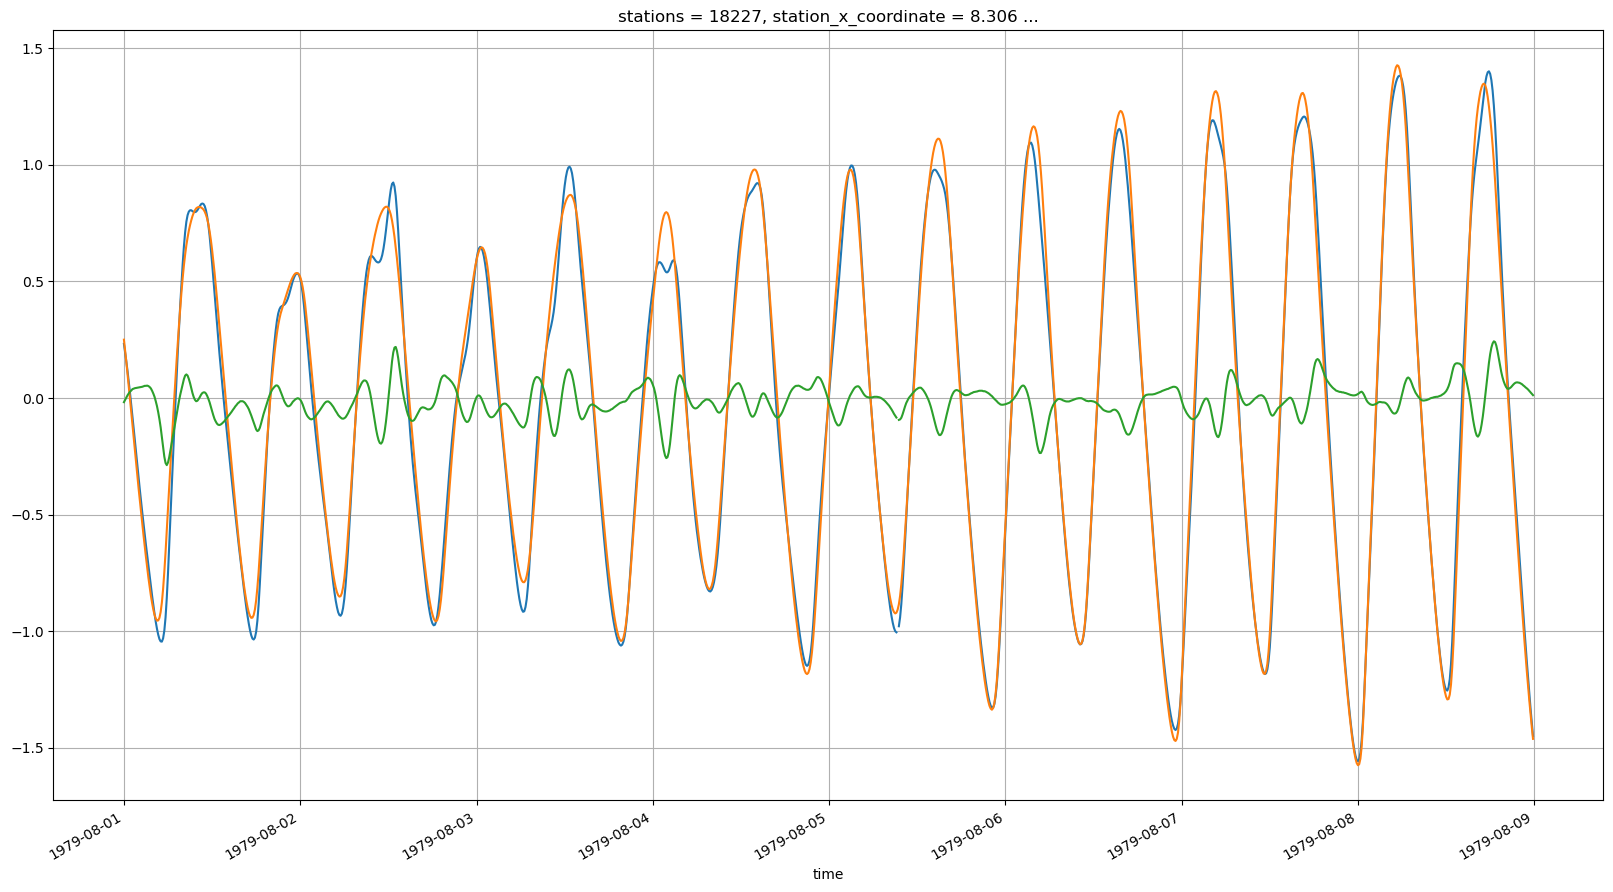

In [79]:
fig,ax = plt.subplots(figsize=(20,10))
ds_wl_1979['waterlevel'].sel(time=slice('1979-08-01','1979-08-08'), stations=stations_gtsm[0]).plot(ax=ax)
ds_tide_1979['tide'].sel(time=slice('1979-08-01','1979-08-08'), stations=stations_gtsm[0]).plot(ax=ax)
(ds_wl_1979['waterlevel'].sel(stations=stations_gtsm[0],time=slice('1979-08-01','1979-08-08'))-ds_tide_1979['tide'].sel(stations=stations_gtsm[0],time=slice('1979-08-01','1979-08-08'))).plot(ax=ax)
ax.grid()

In [82]:

ds_wl_1980 = read_his_file(os.path.join('/projects/0/einf3499/06_model_runs/99_slr_tide_surge_runs_oldproject/model_input_ERA5_1980/output','gtsm_fine_0000_his.nc'))
ds_tide_1980 = read_his_file(os.path.join('/projects/0/einf3499/06_model_runs/99_slr_tide_surge_runs_oldproject/model_input_tide_1980/output','gtsm_fine_0000_his.nc'))


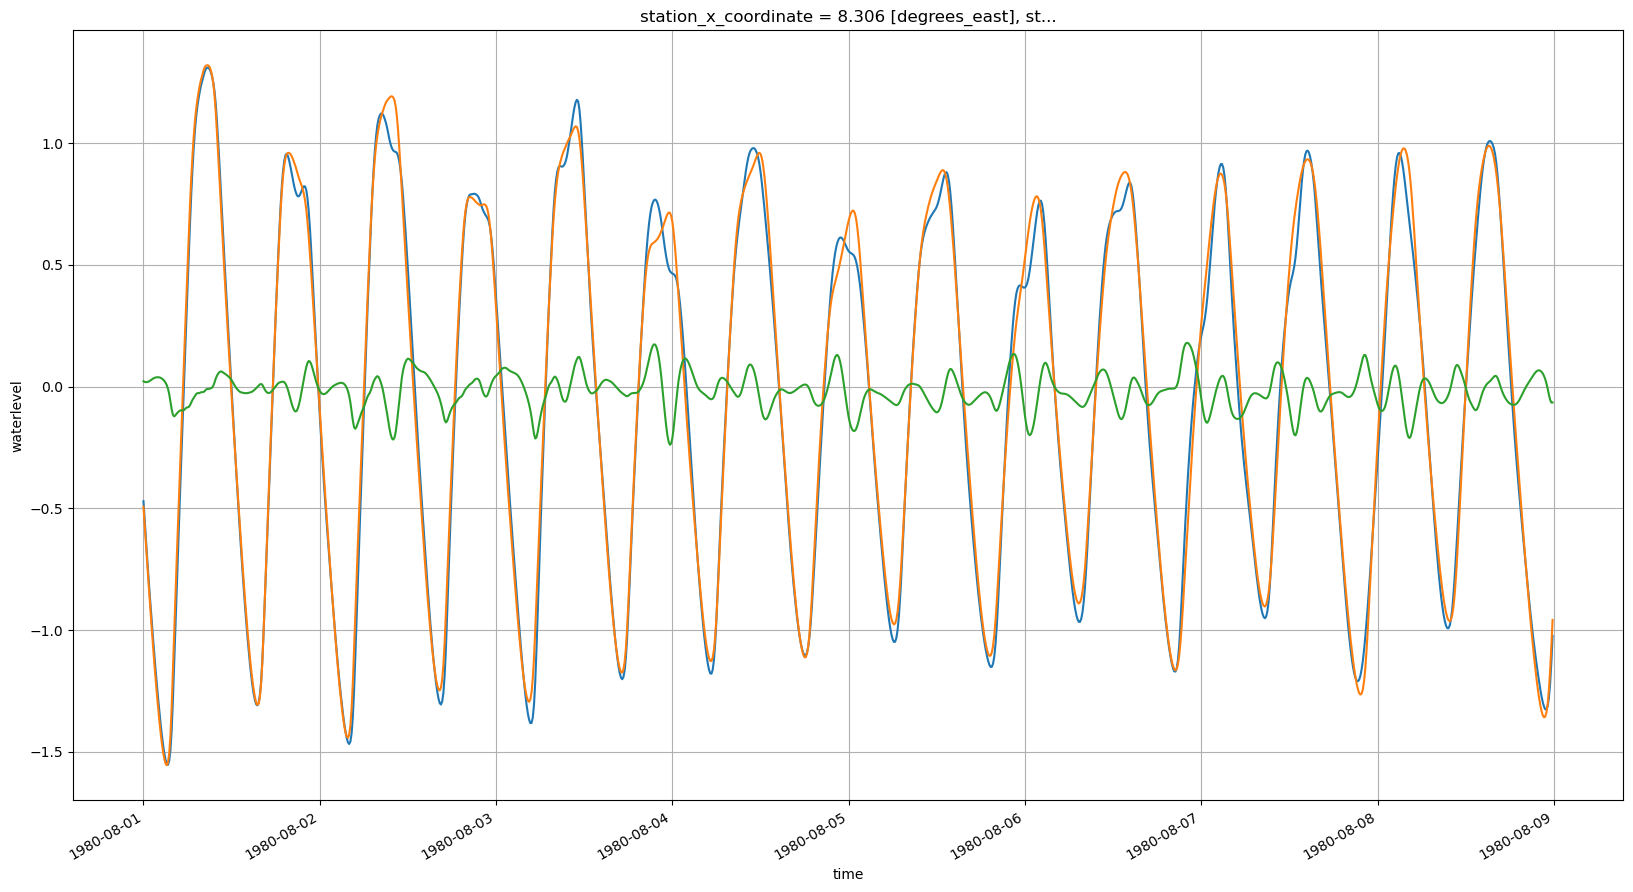

In [84]:
fig,ax = plt.subplots(figsize=(20,10))
ds_wl_1980['waterlevel'].sel(time=slice('1980-08-01','1980-08-08'), stations=stations_gtsm[0]).plot(ax=ax)
ds_tide_1980['waterlevel'].sel(time=slice('1980-08-01','1980-08-08'), stations=stations_gtsm[0]).plot(ax=ax)
(ds_wl_1980['waterlevel'].sel(stations=stations_gtsm[0],time=slice('1980-08-01','1980-08-08'))-ds_tide_1980['waterlevel'].sel(stations=stations_gtsm[0],time=slice('1980-08-01','1980-08-08'))).plot(ax=ax)
ax.grid()

In [17]:
files = glob.glob(os.path.join('/projects/0/einf3499/06_model_runs/03_postprocessing/timeseries-GTSM-ERA5-hourly_old/surge/','reanalysis_surge_hourly_196*_*_v1.nc'))

In [18]:
ds_sur_1960 = xr.open_mfdataset(files)

In [19]:
files = glob.glob(os.path.join('/projects/0/einf3499/06_model_runs/03_postprocessing/timeseries-GTSM-ERA5-hourly-1979-2018/surge/','reanalysis_surge_hourly_198*_*_v1.nc'))

In [20]:
ds_sur_1980 = xr.open_mfdataset(files)

In [21]:
files = glob.glob(os.path.join('/projects/0/einf3499/06_model_runs/03_postprocessing/timeseries-GTSM-ERA5-hourly-1979-2018/surge/','reanalysis_surge_hourly_199*_*_v1.nc'))
ds_sur_1990 = xr.open_mfdataset(files)

In [22]:
#ds_sur_1979['surge_p95'] = ds_sur_1979['surge'].quantile([0.95], dim='time')
#ds_sur_1978['surge_p95'] = ds_sur_1978['surge'].quantile([0.95], dim='time')
ds_sur_1960['surge_std'] = ds_sur_1960['surge'].std(dim='time')
ds_sur_1980['surge_std'] = ds_sur_1980['surge'].std(dim='time')
ds_sur_1990['surge_std'] = ds_sur_1990['surge'].std(dim='time')

In [23]:
std_1960 = ds_sur_1960['surge_std'].compute()
std_1980 = ds_sur_1980['surge_std'].compute()
std_1990 = ds_sur_1990['surge_std'].compute()

In [44]:
std_diff_1980_1990 = (std_1980 - std_1990).where(np.abs(std_1980-std_1990)>0.02, np.nan)

In [45]:
std_diff_1980_1960 = (std_1980 - std_1960).where(np.abs(std_1980-std_1960)>0.02, np.nan)

In [46]:
ds_sur_1990.isel(time=0).station_x_coordinate.load()
ds_sur_1990.isel(time=0).station_x_coordinate.load()

<xarray.DataArray 'station_x_coordinate' (stations: 43119)>
array([ 24.089,  24.089,  26.902, ..., 139.146,  37.749,  37.954])
Coordinates:
    time                  datetime64[ns] 1990-01-01
    station_x_coordinate  (stations) float64 24.09 24.09 26.9 ... 37.75 37.95
    station_y_coordinate  (stations) float64 34.83 34.87 35.37 ... -46.98 -46.63
  * stations              (stations) uint16 0 1 2 3 ... 43730 43731 43732 43733
Attributes:
    units:       degrees_east
    short_name:  longitude
    long_name:   longitude
    crs:         EPSG:4326

Text(0.5, 1.0, 'Surge STD difference between 1980-1989 and 1960-1969')

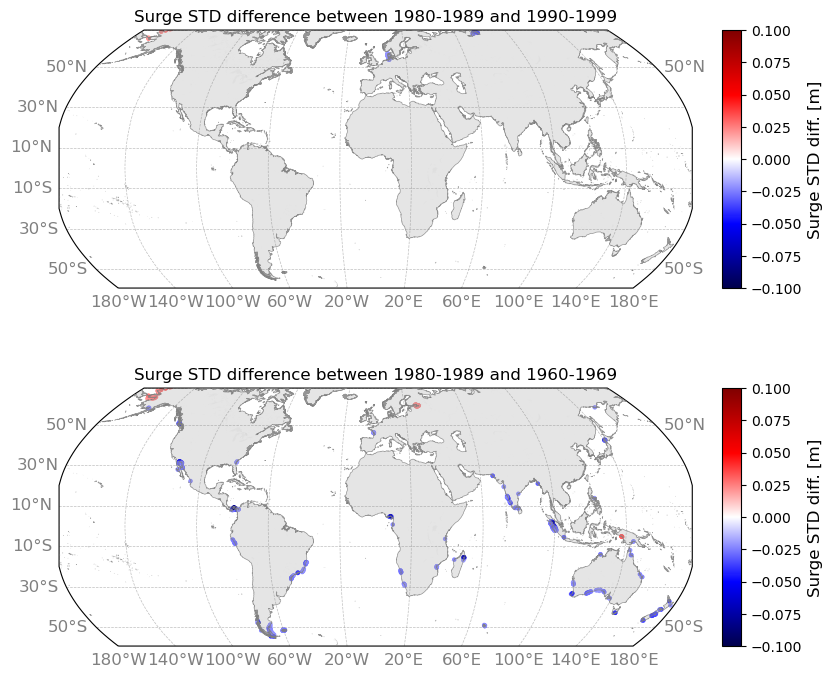

In [55]:
# fig,(ax1, ax2) = plt.subplots(nrows=2, figsize=(12,8))
# # bs = ax.scatter(x=ds_sur_1979.station_x_coordinate.values,y=ds_sur_1979.station_y_coordinate.values,s=15,c=ds_sur_1979['surge_std'].values,transform=crt.crs.PlateCarree(),cmap=cmap4); 
# # cbar = ax.cax.colorbar(bs); cbar.set_label('Surge std [m]',fontsize=14)

# bs = ax1.scatter(x=ds_sur_1990.isel(time=0).station_x_coordinate.values,y=ds_sur_1990.isel(time=0).station_y_coordinate.values,s=5,c=std_1990-std_1980,cmap=cmap4, vmin=-0.2, vmax=0.2); 
# plt.colorbar(bs); #cbar.set_label('Surge std difference [m]',fontsize=14)

# bs = ax2.scatter(x=ds_sur_1990.isel(time=0).station_x_coordinate.values,y=ds_sur_1990.isel(time=0).station_y_coordinate.values,s=5,c=std_1980-std_1960,cmap=cmap4, vmin=-0.2, vmax=0.2); 
# plt.colorbar(bs); #cbar.set_label('Surge std difference [m]',fontsize=14)


fig = plt.figure(figsize=(12,8))
axes_class = (GeoAxes, dict(projection=crt.crs.Robinson()))
axs = AxesGrid(fig, 111, axes_class=axes_class, nrows_ncols=(2, 1), share_all=True, axes_pad=1,cbar_location='right',cbar_mode='each',cbar_size='3%',cbar_pad=0.3, label_mode='keep')
ax = global_map(axs[0])
bs = ax.scatter(x=ds_sur_1990.isel(time=0).station_x_coordinate.values,y=ds_sur_1990.isel(time=0).station_y_coordinate.values,s=5,c=std_diff_1980_1990,transform=crt.crs.PlateCarree(),cmap=cmap4, vmin=-0.10, vmax=0.10); 
cbar = ax.cax.colorbar(bs); cbar.set_label('Surge STD diff. [m]',fontsize=12)
ax.set_title('Surge STD difference between 1980-1989 and 1990-1999')
    
ax = global_map(axs[1])
bs = ax.scatter(x=ds_sur_1990.isel(time=0).station_x_coordinate.values,y=ds_sur_1990.isel(time=0).station_y_coordinate.values,s=5,c=std_diff_1980_1960,transform=crt.crs.PlateCarree(),cmap=cmap4, vmin=-0.10, vmax=0.10); 
cbar = ax.cax.colorbar(bs); cbar.set_label('Surge STD diff. [m]',fontsize=12)
ax.set_title("Surge STD difference between 1980-1989 and 1960-1969")

In [48]:
# checking ERA5 data
def preprocess(x):
  if "valid_time" in x.coords:
      x = x.rename({'valid_time':"time"})
  if "expver" in x.coords:
      x = x.drop({"expver"})
  return x
dir_era5 = '/projects/0/einf3499/01_meteo_ERA5/'
files_era5 = glob.glob(os.path.join(dir_era5,'ERA5_CDS_atm_197?-??-??.nc'))
files_era5.sort()
files_era5_2 = glob.glob(os.path.join(dir_era5,'ERA5_CDS_atm_198?-??-??.nc'))
files_era5_2.sort()
files_era5 = files_era5[1800:] + files_era5_2[:1800]



In [46]:
ds_era5 = xr.open_mfdataset(files_era5, preprocess=preprocess, coords='minimal')
ds_era5

<xarray.Dataset>
Dimensions:    (longitude: 1440, latitude: 721, time: 52992)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 1974-12-06 ... 1981-01-31T23:00:00
    number     int64 0
Data variables:
    u10        (time, latitude, longitude) float32 dask.array<chunksize=(24, 721, 1440), meta=np.ndarray>
    v10        (time, latitude, longitude) float32 dask.array<chunksize=(24, 721, 1440), meta=np.ndarray>
    msl        (time, latitude, longitude) float32 dask.array<chunksize=(24, 721, 1440), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2022-12-19 20:15:18 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

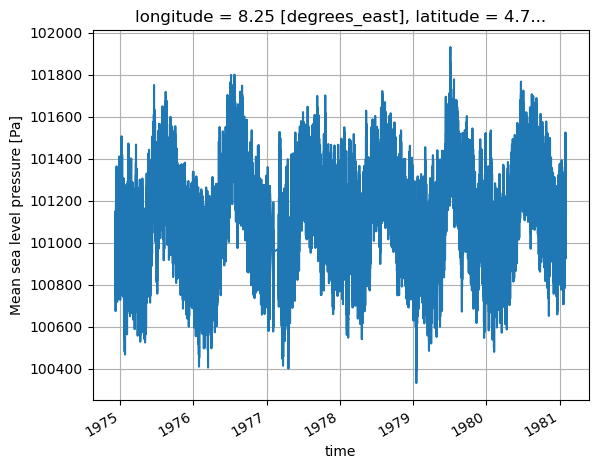

In [47]:
fig, ax = plt.subplots()
ds_era5.sel(latitude=4.756857, longitude=8.353922, method='nearest')['msl'].plot(ax=ax)
ax.grid()


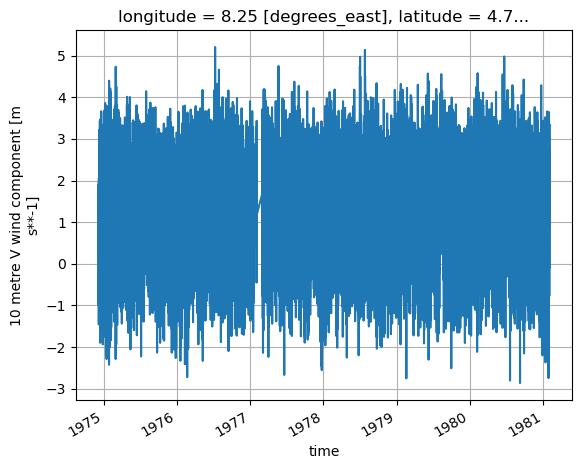

In [48]:
fig, ax = plt.subplots()
ds_era5.sel(latitude=4.756857, longitude=8.353922, method='nearest')['v10'].plot()
ax.grid()

In [ ]:
fig, ax = plt.subplots()
ds_era5.sel(latitude=4.756857, longitude=8.353922, method='nearest')['u10'].plot()
ax.grid()

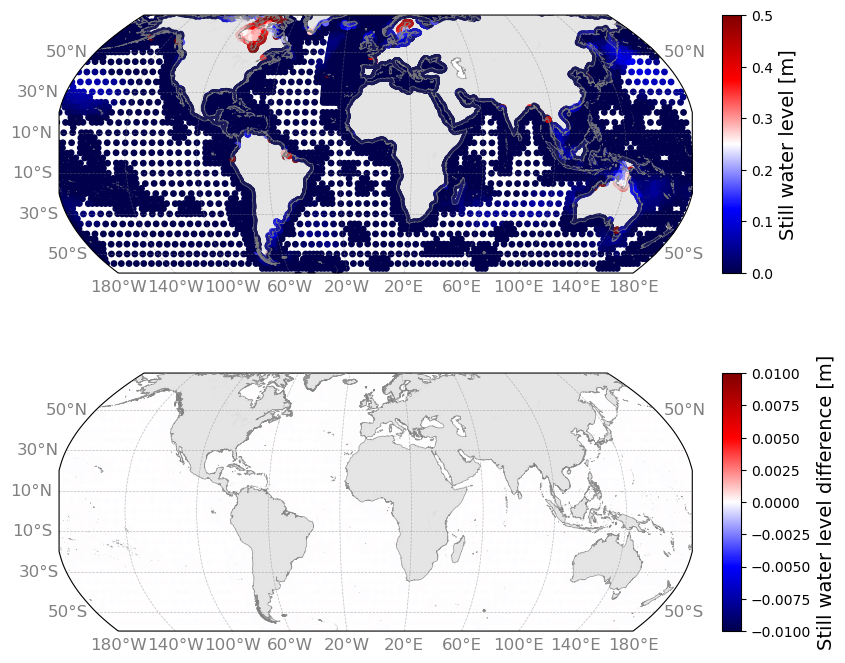

In [25]:
# vrange1=[0,0.5]; vrange2=[-0.01,0.01]; 

# fig = plt.figure(figsize=(12,8))
# axes_class = (GeoAxes, dict(projection=crt.crs.Robinson()))
# axs = AxesGrid(fig, 111, axes_class=axes_class, nrows_ncols=(2, 1), share_all=True, axes_pad=1,cbar_location='right',cbar_mode='each',cbar_size='3%',cbar_pad=0.3, label_mode='keep')
# ax = global_map(axs[0])
# bs = ax.scatter(x=wl_mean_new.station_x_coordinate.values,y=wl_mean_new.station_y_coordinate.values,s=15,c=wl_mean_new.values,transform=crt.crs.PlateCarree(),cmap=cmap4, vmin=vrange1[0], vmax=vrange1[1]); 
# cbar = ax.cax.colorbar(bs); cbar.set_label('Still water level [m]',fontsize=14)

# ax = global_map(axs[1])
# bs = ax.scatter(x=wl_mean_new.station_x_coordinate.values,y=wl_mean_new.station_y_coordinate.values,s=15,c=wl_mean_new.values-wl_mean_old.values,transform=crt.crs.PlateCarree(),cmap=cmap4, vmin=vrange2[0], vmax=vrange2[1]); 
# cbar = ax.cax.colorbar(bs); cbar.set_label('Still water level difference [m]',fontsize=14)


In [ ]:
'''
# Code for finding station number by coordinates
lat = 29.3
lon = -91.83

# First, find the index of the grid point nearest a specific lat/lon.   
abslat = np.abs(ds_surge_cds.station_y_coordinate.values-lat)
abslon = np.abs(ds_surge_cds.station_x_coordinate.values-lon)
c = np.maximum(abslon, abslat)

([iloc]) = np.where(c == np.min(c))

# Now I can use that index location to get the values at the x/y diminsion
ds_surge_cds.isel(stations=iloc).load()
'''